<a href="https://colab.research.google.com/github/emerson-matos/tcc-notebooks/blob/main/sentimentos/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
!nvidia-smi

Wed Sep 13 05:16:26 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4070 Ti     Off | 00000000:08:00.0  On |                  N/A |
|  0%   41C    P3              28W / 285W |   1049MiB / 12282MiB |     16%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

In [137]:
date = '2023-09-01'
filename = 'analisar.csv'
dados = pd.read_csv(f"/content/gdrive/MyDrive/tcc/exploratoria/{date}-{filename}")

dados.head()[['text', 'source', 'data_avaliacao']]

,text,source,data_avaliacao
0,"Lugar fantástico, recomendo super.",hotel-marsol-beach-resort,2023-07-06
1,Tudo perfeito,hotel-marsol-beach-resort,2023-07-06
2,excelente!,hotel-marsol-beach-resort,2023-07-06
3,Belo lugar.,hotel-marsol-beach-resort,2023-07-06
4,Ótimo local,hotel-marsol-beach-resort,2023-07-06


In [122]:
dados.describe()

,rating,likes,mes_avaliacao,ano_avaliacao
count,49219.000000,49219.000000,49219.000000,49219.000000
mean,4.604787,0.166623,6.790650,2020.699181
std,0.895289,0.731727,1.524495,1.746374
min,1.000000,0.000000,1.000000,2018.000000
25%,5.000000,0.000000,7.000000,2019.000000
50%,5.000000,0.000000,7.000000,2021.000000
75%,5.000000,0.000000,7.000000,2022.000000
max,5.000000,25.000000,12.000000,2023.000000


# 08

In [ ]:
!pip install transformers[sentencepiece] datasets torch

## bert pre treinado

In [213]:
from transformers import AutoTokenizer  # Or BertTokenizer
from transformers import AutoModelForSequenceClassification  # Or BertForPreTraining for loading pretraining heads
from transformers import pipeline

PRE_TRAINED_MODEL_NAME = 'philschmid/distilbert-base-multilingual-cased-sentiment'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = AutoModelForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL_NAME).to(device)
tokenizer = AutoTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME, do_lower_case=False)

classifier = pipeline('sentiment-analysis',
                      model=model,
                      tokenizer=tokenizer,
                      max_length=512,
                      truncation=True,
                      pad_to_max_length=True,
                      device=device,
                      framework="pt",
                      batch_size=16,
)
teste = dados.copy()

teste.head(5)

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,ano_avaliacao,mes_ano_avaliacao,com_texto,nao_vazio,traduzido,depois_2017,analisar
0,2023-07-07 00:33:49.096786,5.0,10 horas atrás,0,False,"Lugar fantástico, recomendo super.",hotel-marsol-beach-resort,9,2023-07-06,7,2023,2023-07,True,True,False,True,True
1,2023-07-07 00:33:49.185915,5.0,10 horas atrás,0,True,Tudo perfeito,hotel-marsol-beach-resort,36,2023-07-06,7,2023,2023-07,True,True,False,True,True
2,2023-07-07 00:33:50.064473,5.0,11 horas atrás,0,True,excelente!,hotel-marsol-beach-resort,52,2023-07-06,7,2023,2023-07,True,True,False,True,True
3,2023-07-07 00:33:50.080896,5.0,11 horas atrás,0,True,Belo lugar.,hotel-marsol-beach-resort,41,2023-07-06,7,2023,2023-07,True,True,False,True,True
4,2023-07-07 00:33:50.109826,5.0,11 horas atrás,0,False,Ótimo local,hotel-marsol-beach-resort,7,2023-07-06,7,2023,2023-07,True,True,False,True,True


In [124]:
def funcao_ordenar(e):
  return e['score']

In [125]:
teste['sentiment_bert'] = teste['text'].apply(lambda x: sorted(classifier(x), key=myFunc))

In [139]:
def get_pipe():
    # This will load the pipeline on demand on the current PROCESS/THREAD.
    # And load it only once.
    global classifier
    if classifier is None:
        tokenizer = AutoTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME, do_lower_case=True, model_max_length=512, truncation=True,
                                                  padding=True, pad_to_max_length=True)
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        model = AutoModelForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL_NAME).to(device)
        pipe = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer, max_length=512, truncation=True,
                        padding=True, pad_to_max_length=True, device=device, framework="pt", batch_size=16)
    return classifier

In [266]:
sentences = [
  "Gostei muito do vídeo!",
  "estou Não esttou feliz com os resultados.Não estou feliz com os resultados.feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados.Não estou feliz com os resultados."
]


classifier(sentences)

[{'label': 'positive', 'score': 0.95329350233078},
 {'label': 'negative', 'score': 0.882006049156189}]

In [146]:
from datasets import Dataset
dataset = Dataset.from_pandas(teste)

In [276]:
dataset = dataset.map(lambda x: {"sentiment_bert": classifier(x['text'])} , batched=True)

Map:   0%|          | 0/49219 [00:00<?, ? examples/s]

In [277]:
dataset[0]

{'retrieval_date': '2023-07-07 00:33:49.096786',
 'rating': 5.0,
 'relative_date': '10 horas atrás',
 'likes': 0,
 'user_is_local_guide': False,
 'text': 'Lugar fantástico, recomendo super.',
 'source': 'hotel-marsol-beach-resort',
 'user_reviews': '9',
 'data_avaliacao': '2023-07-06',
 'mes_avaliacao': 7,
 'ano_avaliacao': 2023,
 'mes_ano_avaliacao': '2023-07',
 'com_texto': True,
 'nao_vazio': True,
 'traduzido': False,
 'depois_2017': True,
 'analisar': True,
 'sentiment_bert': {'label': 'positive', 'score': 0.9849022030830383}}

In [282]:
teste = dataset.to_pandas()

teste.head(5)

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,ano_avaliacao,mes_ano_avaliacao,com_texto,nao_vazio,traduzido,depois_2017,analisar,sentiment_bert
0,2023-07-07 00:33:49.096786,5.0,10 horas atrás,0,False,"Lugar fantástico, recomendo super.",hotel-marsol-beach-resort,9,2023-07-06,7,2023,2023-07,True,True,False,True,True,"{'label': 'positive', 'score': 0.9849022030830..."
1,2023-07-07 00:33:49.185915,5.0,10 horas atrás,0,True,Tudo perfeito,hotel-marsol-beach-resort,36,2023-07-06,7,2023,2023-07,True,True,False,True,True,"{'label': 'positive', 'score': 0.9701986312866..."
2,2023-07-07 00:33:50.064473,5.0,11 horas atrás,0,True,excelente!,hotel-marsol-beach-resort,52,2023-07-06,7,2023,2023-07,True,True,False,True,True,"{'label': 'positive', 'score': 0.9857670068740..."
3,2023-07-07 00:33:50.080896,5.0,11 horas atrás,0,True,Belo lugar.,hotel-marsol-beach-resort,41,2023-07-06,7,2023,2023-07,True,True,False,True,True,"{'label': 'positive', 'score': 0.8551892638206..."
4,2023-07-07 00:33:50.109826,5.0,11 horas atrás,0,False,Ótimo local,hotel-marsol-beach-resort,7,2023-07-06,7,2023,2023-07,True,True,False,True,True,"{'label': 'positive', 'score': 0.8495931029319..."


In [283]:
def myFunc(e):
  return e['score']

teste['sentiment_label'] = teste['sentiment_bert'].apply(lambda x: x['label'])
teste['sentiment_score'] = teste['sentiment_bert'].apply(lambda x: x['score'])

In [284]:
teste[['source', 'text', 'ano_avaliacao', 'sentiment_label', 'sentiment_score', 'sentiment_bert']].head()

,source,text,ano_avaliacao,sentiment_label,sentiment_score,sentiment_bert
0,hotel-marsol-beach-resort,"Lugar fantástico, recomendo super.",2023,positive,0.984902,"{'label': 'positive', 'score': 0.9849022030830..."
1,hotel-marsol-beach-resort,Tudo perfeito,2023,positive,0.970199,"{'label': 'positive', 'score': 0.9701986312866..."
2,hotel-marsol-beach-resort,excelente!,2023,positive,0.985767,"{'label': 'positive', 'score': 0.9857670068740..."
3,hotel-marsol-beach-resort,Belo lugar.,2023,positive,0.855189,"{'label': 'positive', 'score': 0.8551892638206..."
4,hotel-marsol-beach-resort,Ótimo local,2023,positive,0.849593,"{'label': 'positive', 'score': 0.8495931029319..."


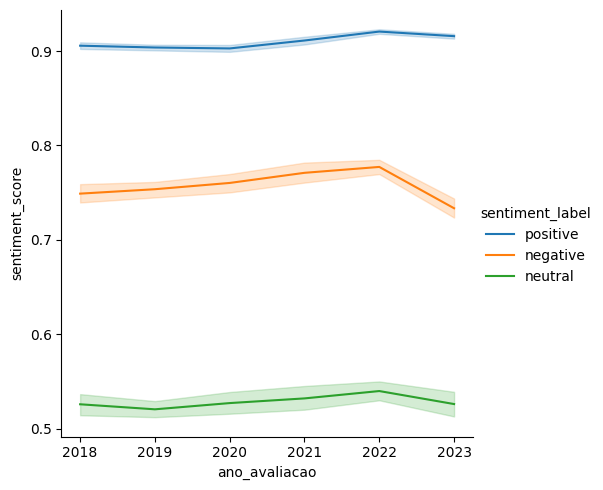

In [286]:
import seaborn as sns


sns.relplot(x='ano_avaliacao', y='sentiment_score', kind="line", hue='sentiment_label', data=teste)

<Axes: xlabel='ano_avaliacao', ylabel='count'>

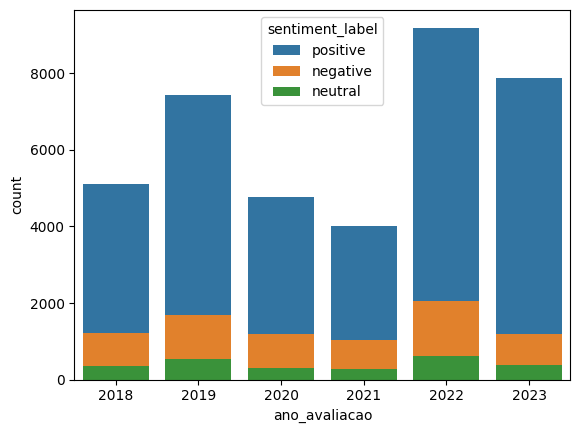

In [308]:
sns.countplot(x='ano_avaliacao',
              hue='sentiment_label',
              data=teste,
              dodge=False)

<Axes: xlabel='ano_avaliacao', ylabel='count'>

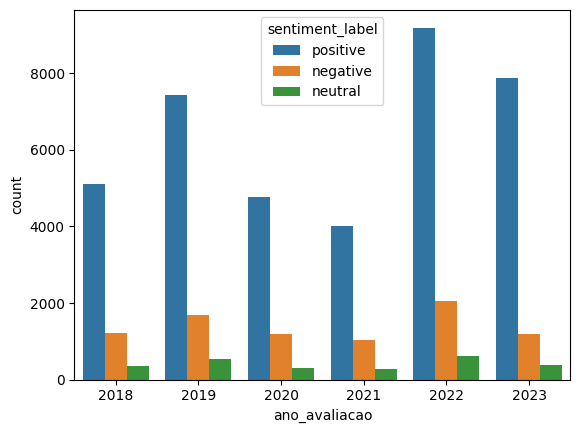

In [327]:
sns.countplot(x='ano_avaliacao',
              hue='sentiment_label',
              data=teste)

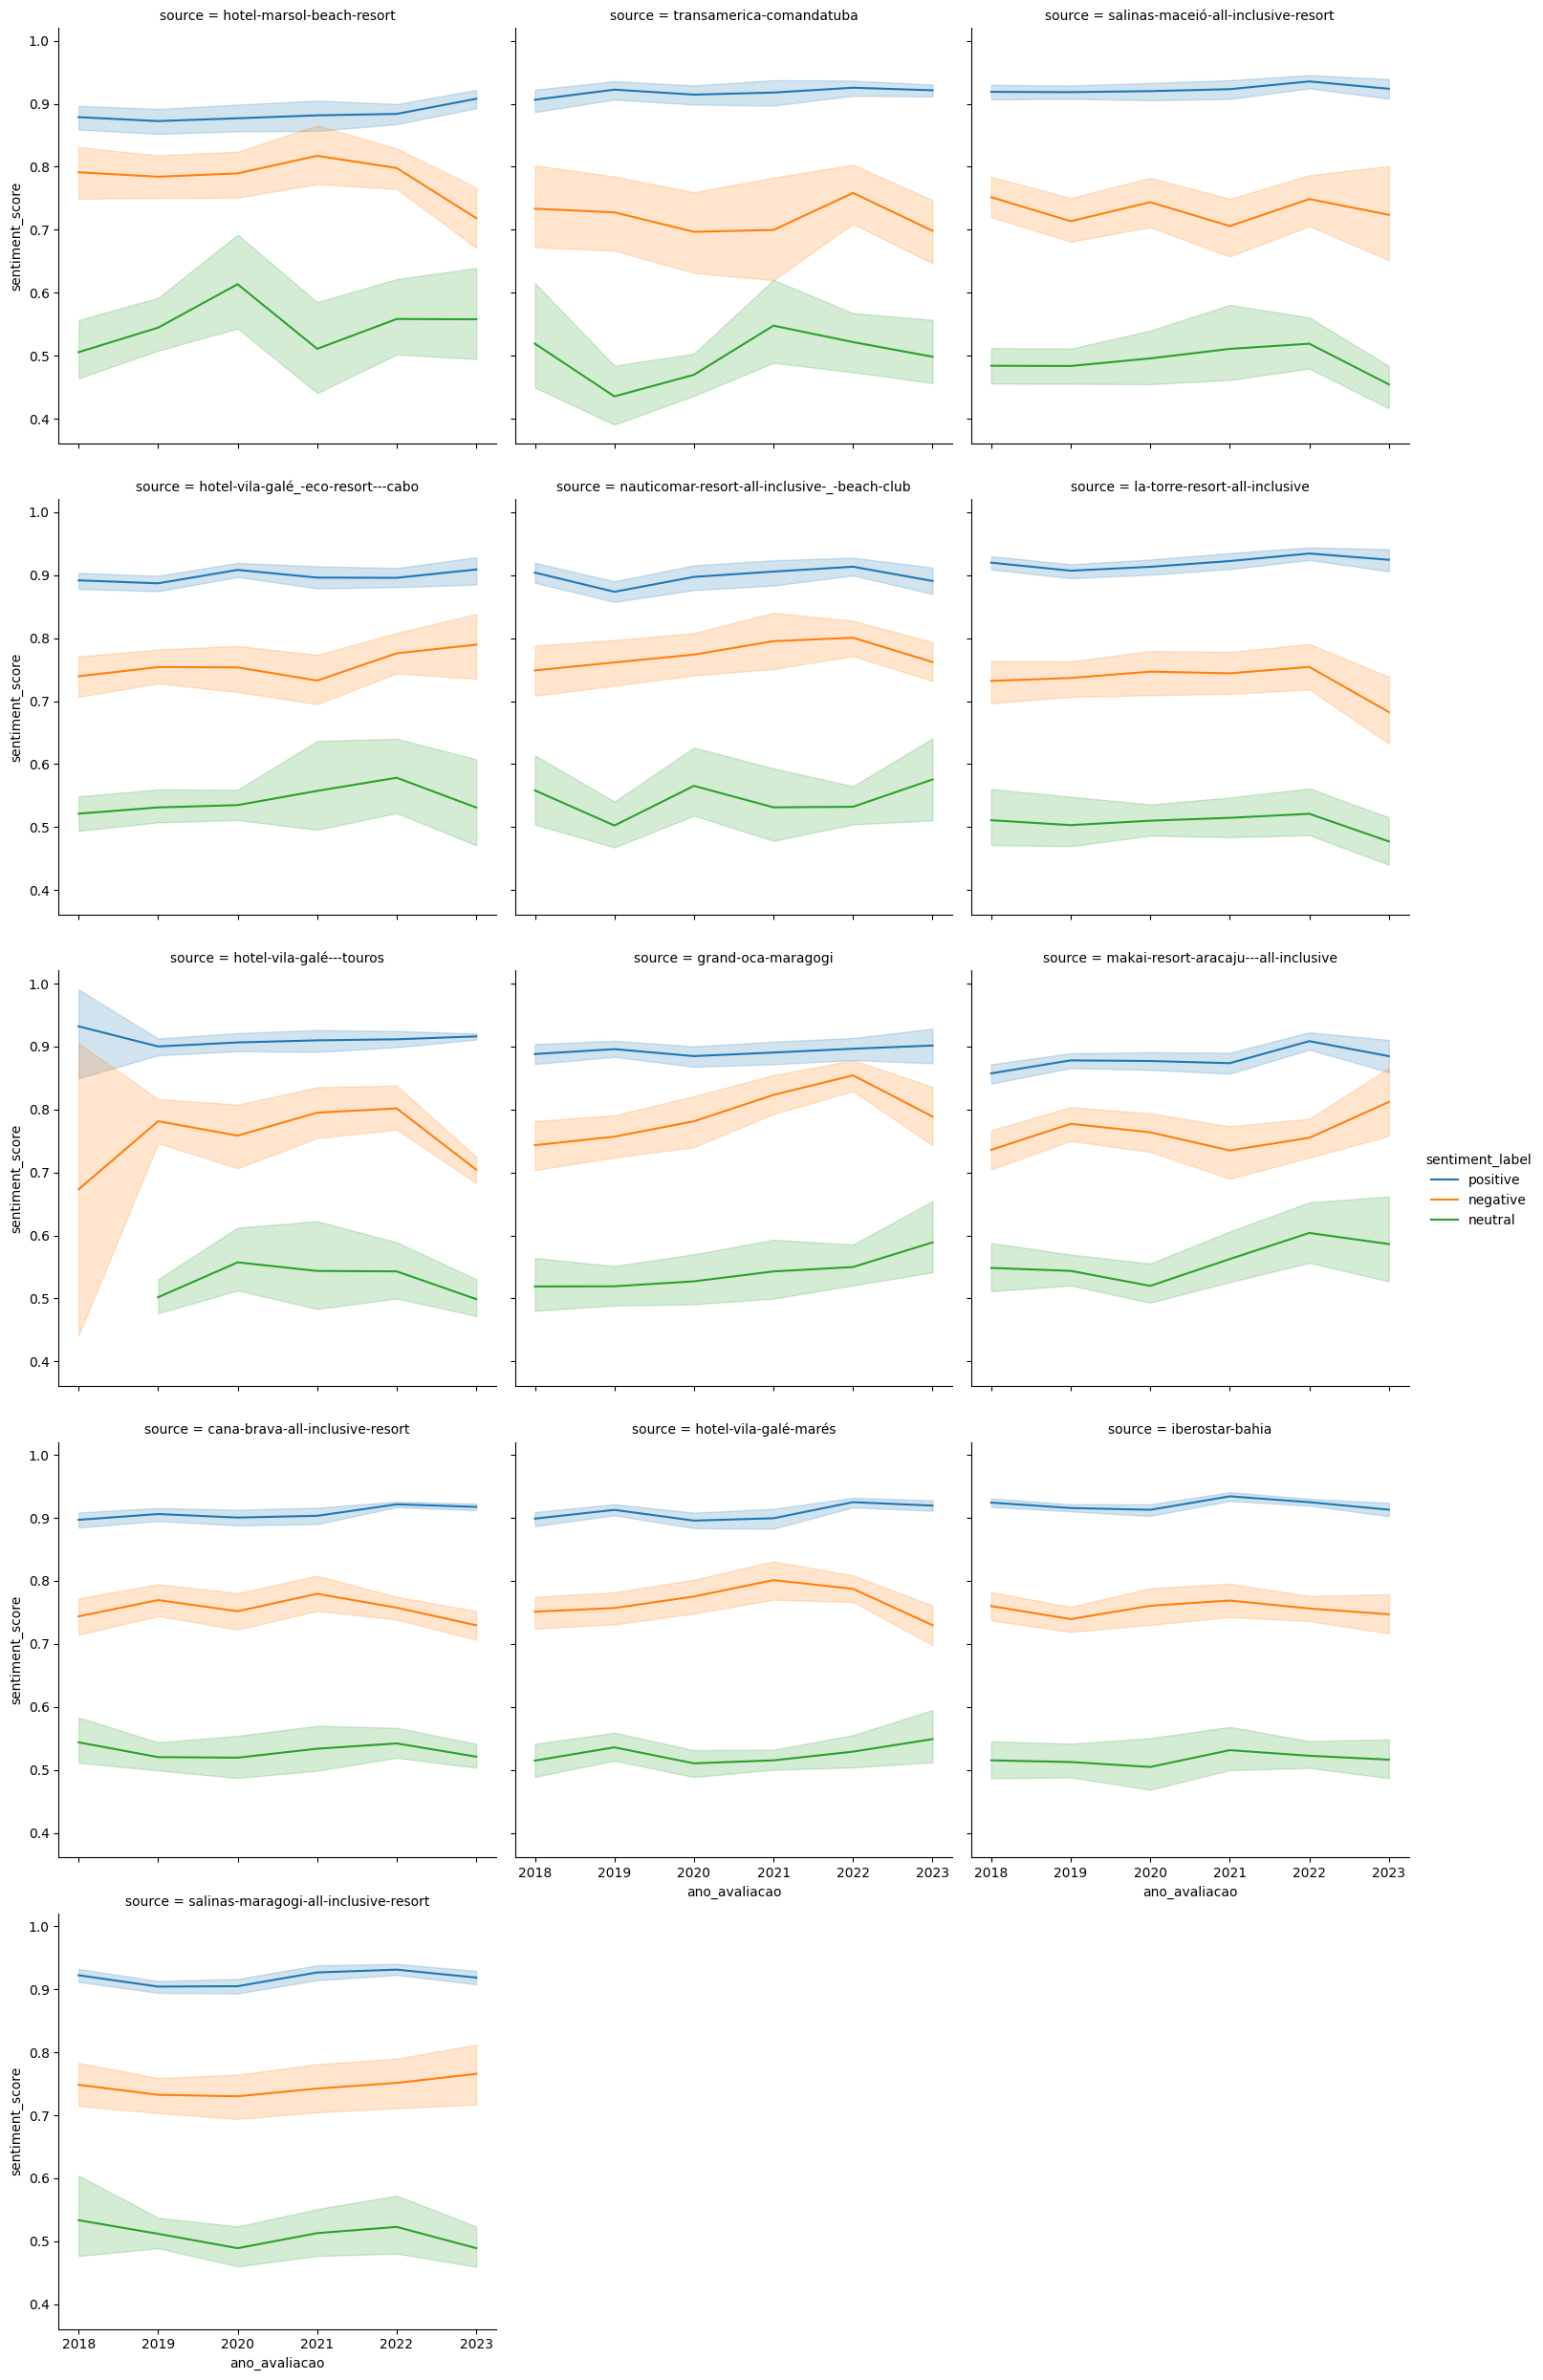

In [389]:
sns.relplot(x='ano_avaliacao', col_wrap=3, col="source", y='sentiment_score', hue='sentiment_label', data=teste, kind='line')

# bert

https://medium.com/data-hackers/an%C3%A1lise-de-sentimentos-em-portugu%C3%AAs-utilizando-pytorch-e-python-91a232165ec0

https://sol.sbc.org.br/index.php/stil/article/view/17784

https://towardsdatascience.com/sentiment-analysis-in-10-minutes-with-bert-and-hugging-face-294e8a04b671

In [ ]:
import transformers
from transformers import BertModel, BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup, pipeline

In [ ]:
from transformers import AutoModel, AutoTokenizer

PRE_TRAINED_MODEL_NAME = 'neuralmind/bert-base-portuguese-cased'

# Using the community model
# BERT Base
model = BertForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL_NAME)
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

PRE_TRAINED_MODEL_NAME_LARGE = 'neuralmind/bert-large-portuguese-cased'

# BERT Large
tokenizer_large = AutoTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME_LARGE)
model_large = AutoModel.from_pretrained(PRE_TRAINED_MODEL_NAME_LARGE)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [ ]:
nlp("Meu cachorro é muito top")

[{'label': 'LABEL_0', 'score': 0.6387052536010742}]

In [ ]:
classifications = [model.config.id2label[output] for output in [1,0]]
print(classifications)

['LABEL_1', 'LABEL_0']


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

input_ids = tokenizer("Olá, meu cachorro é uma gracinha", add_special_tokens=True)  # Batch size 1
outputs = model(input_ids).logits

classifications = np.argmax(outputs, axis=1)
print(classifications)

AttributeError: ignored

In [ ]:
classifications = [model.config.id2label[output] for output in classifications]
print(classifications)

KeyError: ignored

In [ ]:
logits

In [ ]:
from transformers import BertTokenizer, BertForTokenClassification
import torch

tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
model = BertForTokenClassification.from_pretrained(PRE_TRAINED_MODEL_NAME)

input_ids = torch.tensor(tokenizer.encode("Olá, meu cachorro é uma gracinha", add_special_tokens=True)).unsqueeze(0)  # Batch size 1
labels = torch.tensor([1] * input_ids.size(1)).unsqueeze(0)  # Batch size 1
outputs = model(input_ids, labels=labels)

logits = outputs.logits

In [ ]:
def to_sentiment(rating):
  rating = float(rating)
  if rating < 3:
    return 0
  elif rating > 4:
    return 2
  else:
    return 1

df['sentiment'] = df.rating.apply(to_sentiment)
df.head()

In [ ]:
class_names = ['negative', 'neutral', 'positive']

In [ ]:
ax= sns.countplot(x=df.sentiment)
plt.xlabel('review sentiment')
ax.set_xticklabels(class_names);

In [ ]:
%mkdir -p gdrive/MyDrive/tcc/bert
file_csv_data = 'gdrive/MyDrive/tcc/bert/reviews.csv'
df.to_csv(file_csv_data, index=None, header=True)

In [ ]:
sample_txt = df.loc[1]['text']
sample_txt

In [ ]:
tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f' Sentence: {sample_txt}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

In [ ]:
encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=45,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
)

encoding.keys()

In [ ]:
print(len(encoding['input_ids'][0]))
encoding['input_ids'][0]

In [ ]:
print(tokenizer.convert_ids_to_tokens(encoding['input_ids'][0]))

In [ ]:
token_lens = []

for txt in df.text:
  tokens = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(tokens))

In [ ]:
# deprecated sns.distplot(token_lens)
sns.histplot(token_lens,
             kde=True,
             stat="density",
             kde_kws=dict(cut=3),
             alpha=.4,
             edgecolor=(1, 1, 1, .4),
             )
plt.xlim([0, 600]);
plt.xlabel('Token count');

In [ ]:
max(token_lens)

In [ ]:
MAX_LEN = 512

In [ ]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

In [ ]:
class GPReviewDataset(Dataset):

  def __init__(self, reviews, targets, tokenizer, max_len):
    self.reviews = reviews
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.reviews)

  def __getitem__(self, item):
    review = str(self.reviews[item])
    target = self.targets[item]

    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      #padding='longest',
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
    )

    return {
      'review_text': review,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.1, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED)

df_train.shape, df_val.shape, df_test.shape

In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = GPReviewDataset(
    reviews=df.text.to_numpy(),
    targets=df.sentiment.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4
  )

In [ ]:
BATCH_SIZE = 16

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [ ]:
len(train_data_loader)

In [ ]:
data = next(iter(train_data_loader))
data.keys()

In [ ]:
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

In [ ]:
class SentimentClassifier(torch.nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME, return_dict=False)
    self.drop = torch.nn.Dropout(p=0.3)
    #The last_hidden_state is a sequence of hidden states of the last layer of the model
    self.out = torch.nn.Linear(self.bert.config.hidden_size, n_classes)

  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    output = self.drop(pooled_output)
    return self.out(output)


In [ ]:
model = SentimentClassifier(len(class_names))
model = model.to(device)

In [ ]:
EPOCHS = 10

optimizer = AdamW(model.parameters(), lr=3e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = torch.nn.CrossEntropyLoss().to(device)

In [ ]:
def train_epoch(
  model,
  data_loader,
  loss_fn,
  optimizer,
  device,
  scheduler,
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0

  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
%%time
from collections import defaultdict
history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    len(df_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn,
    device,
    len(df_val)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

In [ ]:
history

In [ ]:
history['train_acc']

In [ ]:
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')

plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

In [ ]:
def get_predictions(model, data_loader):
  model = model.eval()

  review_texts = []
  predictions = []
  prediction_probs = []
  real_values = []

  with torch.no_grad():
    for d in data_loader:

      texts = d["review_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      probs = F.softmax(outputs, dim=1)

      review_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(probs)
      real_values.extend(targets)

  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return review_texts, predictions, prediction_probs, real_values

In [ ]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  test_data_loader
)

In [ ]:
print(classification_report(y_test, y_pred, target_names=class_names))

In [ ]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)